In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def dirichlet_pdf(x, alpha):
    return stats.dirichlet.pdf(x, alpha)

In [3]:
def metropolis_hastings_dirichlet(alpha, num_samples, burn_in=1000):
    K = len(alpha)
    samples = []
    
    # Iniciar com uma amostra da Dirichlet
    current_sample = np.random.dirichlet(alpha)
    
    for _ in range(num_samples + burn_in):
        # Proposta de uma nova amostra a partir de uma distribuição normal
        proposal = np.random.dirichlet(alpha)
        
        # Calcular a razão de aceitação
        current_pdf = dirichlet_pdf(current_sample, alpha)
        proposal_pdf = dirichlet_pdf(proposal, alpha)
        acceptance_ratio = proposal_pdf / current_pdf
        
        # Aceitar ou rejeitar a amostra proposta
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal
        
        # Adicionar amostra após o burn-in
        if _ >= burn_in:
            samples.append(current_sample)
    
    return np.array(samples)

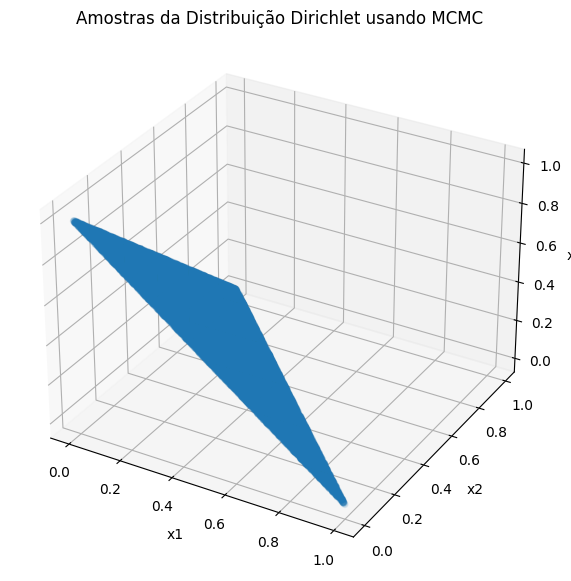

In [4]:
# Parâmetros da distribuição Dirichlet
alpha = np.array([1, 1, 1])

# Número de amostras desejado
num_samples = 5*10**4

# Gerar amostras usando Metropolis-Hastings
samples = metropolis_hastings_dirichlet(alpha, num_samples)

# Plotar as amostras
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], alpha=0.1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Amostras da Distribuição Dirichlet usando MCMC')
plt.show()